In [1]:
import numpy
import matplotlib.pyplot as plot
import os
import cv2
import tensorflow as tf

DATADIR = "PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for image in os.listdir(path):
        images = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE) # Попробовать без перевода в серый
        break
    break

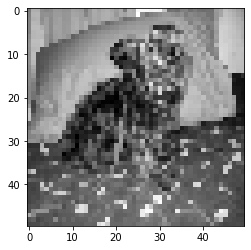

In [2]:
IMG_SIZE = 50 # change to 120

images_compression = cv2.resize(images, (IMG_SIZE, IMG_SIZE))
plot.imshow(images_compression, cmap='gray')
plot.show()

In [3]:
IMG_SIZE = 50 # change to 120

data = []

def load_data():   
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        category_index = CATEGORIES.index(category)

        for image in os.listdir(path):
            gray_image = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            if gray_image is None:
                continue
            compression_image = cv2.resize(gray_image, (IMG_SIZE, IMG_SIZE))
            data.append([compression_image, category_index])

load_data()

In [ ]:
data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(data))

In [4]:
print(len(data))

24946


In [ ]:
#shuffled_data = tf.random.shuffle(data)

#x_train, x_test = tf.split(tf.random.shuffle(data), len(data) * 0.6)

In [5]:
import random

random.shuffle(data)

In [6]:
x_train = []
x_test = []
y_train = []
y_test = []

number_of_train = int(len(data) * 0.8)
i = 0

for features, label in data:
    if i < number_of_train:
        x_train.append(features)
        y_train.append(label)
    else:
        x_test.append(features)
        y_test.append(label)
    i += 1

    
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

19956
19956
4990
4990


In [7]:
x_train = numpy.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # last number must be 3 for RGB
x_test = numpy.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [8]:
import pickle

pickle_out = open("x_train.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()


pickle_out = open("x_test.pickle", "wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [ ]:
import pickle

pickle_in = open("x_train.pickle", "rb")
x_train = pickle.load(pickle_in)

pickle_in = open("x_test.pickle", "rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

pickle_in = open("y_test.pickle", "rb")
y_test = pickle.load(pickle_in)


In [ ]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

X = numpy.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)